## 23년도 1월의 발행년도와 대출건수 관계

### KDC의 분류
#### 000 – 총류: 컴퓨터 과학, 정보학, 백과사전
#### 100 – 철학: 철학, 윤리학, 심리학
#### 200 – 종교: 종교 일반, 불교, 기독교
#### 300 – 사회과학: 사회학, 법학, 정치학, 경제학
#### 400 – 자연과학: 수학, 물리학, 생물학
#### 500 – 기술과학: 의학, 공학, 농업
#### 600 – 예술: 미술, 음악, 체육
#### 700 – 언어: 언어학, 한국어, 외국어
#### 800 – 문학: 한국 문학, 세계 문학
#### 900 – 역사: 한국사, 세계사, 지리

In [26]:
import pandas as pd
lib = pd.read_csv('2023_01.csv')

C:\Users\shs21\AppData\Local\Temp\ipykernel_22152\3806304882.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  lib = pd.read_csv('2023_01.csv')


In [28]:
lib

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1.0,"헤이세이사 - 1989-2019 어제의 세계, 모든 것","요나하 준 지음, 이충원 옮김",마르코폴로,2022,9791192667102.0,NaN,NaN,NaN,NaN,1.0,0.0,2023-01-30
1,2.0,몸으로 읽는 세계사 - 사소한 몸에 숨겨진 독특하고 거대한 문명의 역사,"캐스린 페트라스, 로스 페트라스 (지은이), 박지선 (옮긴이)",다산초당(다산북스),2023,9791130695303.0,NaN,NaN,NaN,NaN,1.0,0.0,2023-01-30
2,3.0,히틀러의 주치의들 - 권력자들의 삶과 죽음,양성관 (지은이),드러커마인드,2023,9791191384376.0,NaN,NaN,NaN,NaN,1.0,0.0,2023-01-30
3,4.0,"우리의 기원, 단일하든 다채롭든 - 상상과 과학의 경계에서 찾아가는 한민족의 흔적",강인욱 지음,21세기북스,2022,9788950978877.0,NaN,NaN,NaN,NaN,1.0,0.0,2023-01-30
4,5.0,광화문 괴담 - 오류와 왜곡에 맞서는 박종인 기자의 역사 전쟁,박종인 (지은이),와이즈맵,2022,9791189328986.0,NaN,NaN,NaN,NaN,1.0,0.0,2023-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
429767,385433.0,떨어진 꽃은 줍지 않는다,김정섭 지음,중앙일보사,1994,9788946100800,NaN,NaN,4,813.6,1.0,0.0,1970-01-01
429768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# 주제분류번호를 문자열로 변환한 후 100 단위로 잘라서 그룹화
lib['주제분류번호'] = lib['주제분류번호'].astype(str)  # float를 문자열로 변환

# 주제분류번호를 100 단위로 잘라서 그룹화
lib['주제분류그룹'] = lib['주제분류번호'].apply(lambda x: x.split('.')[0] if '.' in x else x)
lib['주제분류그룹'] = lib['주제분류그룹'].apply(lambda x: x[:1] + '00')

# 그룹별 대출건수 평균 계산
grouped_100 = lib.groupby('주제분류그룹')['대출건수'].mean().sort_values(ascending=False)

# 결과를 상위 10개까지 보여줌
grouped_100.head(10)

주제분류그룹
800    17.529620
700    15.628962
400    15.325689
900    14.264113
100    13.341479
000    12.777778
600    12.682667
500    10.236797
300    10.221991
200     9.358864
Name: 대출건수, dtype: float64

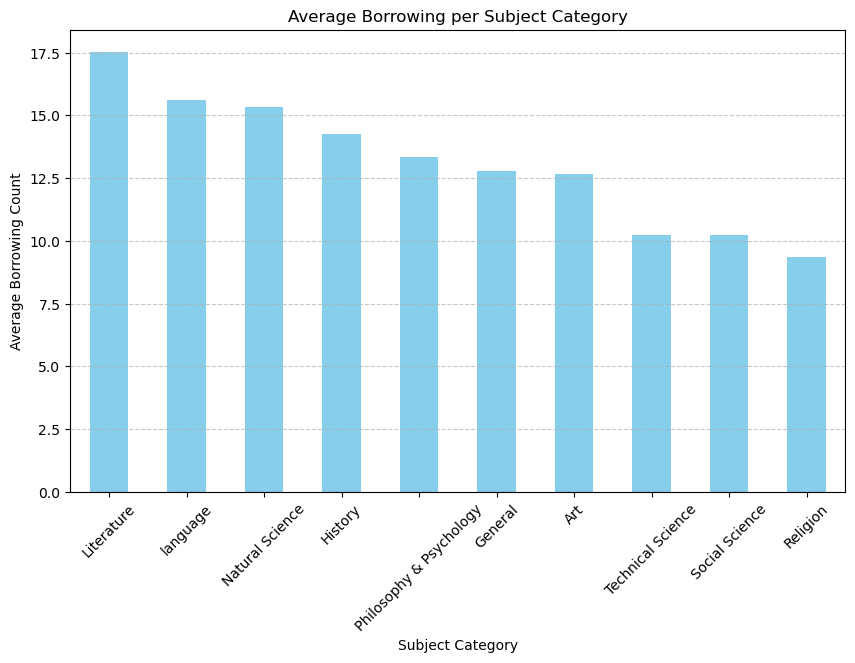

In [38]:
import matplotlib.pyplot as plt

# 주제분류그룹명을 숫자가 아닌 실제 주제로 변환
category_names = {
    '000': 'General',
    '100': 'Philosophy & Psychology',
    '200': 'Religion',
    '300': 'Social Science',
    '400': 'Natural Science',
    '500': 'Technical Science',
    '600': 'Art',
    '700': 'language',
    '800': 'Literature',
    '900': 'History'
}

# 주제분류그룹명을 주제명으로 변환
grouped_100_top10_named = grouped_100.rename(index=category_names).head(10)

# 그래프 생성
plt.figure(figsize=(10, 6))
grouped_100_top10_named.plot(kind='bar', color='skyblue')
plt.title('Average Borrowing per Subject Category')
plt.xlabel('Subject Category')
plt.ylabel('Average Borrowing Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()